<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [51]:
import pandas as pd
import psycopg2

# Скрываем warnings pandas
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [53]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [54]:
# текст запроса
query_3_1 = f'''select 
                    count(*) count_vacancies /*выбираем количество вакансий*/
                from 
                    public.vacancies /*из схемы public таблицы вакансий*/
             '''

In [55]:
# результат запроса
df_3_1 = pd.read_sql_query(query_3_1, connection)
df_3_1

,count_vacancies
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [56]:
# текст запроса
query_3_2 = f'''select 
                    count(*) count_employers /*выбираем количество работодателей*/
                from 
                    public.employers /*из таблицы работодателей*/
             '''

In [57]:
# результат запроса
df_3_2 = pd.read_sql_query(query_3_2, connection)
df_3_2

,count_employers
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [58]:
# текст запроса
query_3_3 = f'''select 
                    count(*) count_areas /*выбираем количество регионов*/
                from 
                    public.areas /*из таблицы регионов*/
             '''

In [59]:
# результат запроса
df_3_3 = pd.read_sql_query(query_3_3, connection)
df_3_3

,count_areas
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [60]:
# текст запроса
query_3_4 = f'''select 
                    count(*) count_industries /*выбираем количество сфер деятельности*/
                from 
                    public.industries /*из таблицы сфер деятельности*/
             '''

In [61]:
# результат запроса
df_3_4 = pd.read_sql_query(query_3_4, connection)
df_3_4

,count_industries
0,294


#### Выводы по предварительному анализу данных ####

В результате предварительного анализа базы вакансий "Head Hunter" мы выяснили, что в базе содержатся данные о 49197 вакансиях, 23501 работодателях, 1362 регионах и 294 сферах деятельности. Также известно, что у одного работодателя может быть несколько сфер деятельности (или работодатели могут вовсе не указать их). Информация о дате размещения вакансий отсутствует.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [62]:
# текст запроса
query_4_1 = f'''select 
                    areas.name area,  
                    count(*) cnt /*выбираем название региона и количество вакансий в нем*/
                from 
                    public.vacancies
                    join public.areas on vacancies.area_id = areas.id /*из схемы public таблиц с вакансиями и регионами*/
                group by areas.name /*группируем по региону*/
                order by 2 desc /*сортируем по количеству в порядке убывания*/
                --limit 5 /*выбираем первые 5 строк*/
             '''

In [63]:
# результат запроса
df_4_1 = pd.read_sql_query(query_4_1, connection)
df_4_1

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [64]:
# текст запроса
query_4_2 = f'''select 
                    count(*) count_vacancies /*количество вакансий*/
                from 
                    vacancies /*из таблицы вакансий*/
                where salary_from is not null 
                    or salary_to is not null /*условие для выборки вакансий с хотя бы одним заполненным полем зарплаты*/
             '''

In [65]:
# результат запроса
df_4_2 = pd.read_sql_query(query_4_2, connection)
df_4_2

,count_vacancies
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [66]:
# текст запроса
query_4_3 = f'''select 
                    round(avg(salary_from)) avg_from,
                    round(avg(salary_to)) avg_to /*окргуленное среднее значение для нижней и верхней заплатной вилки*/
                from 
                    public.vacancies /*из таблицы вакансий*/
             '''

In [67]:
# результат запроса
df_4_3 = pd.read_sql_query(query_4_3, connection)
df_4_3

,avg_from,avg_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [68]:
# текст запроса
query_4_4 = f'''select 
                    schedule, 
                    employment, 
                    count(*) count_vacancies /*выбираем типы графика, трудоустройства и количество вакансий для их сочетаний*/
                from 
                    vacancies /*из таблицы вакансий*/
                group by schedule, employment /*группируем по типу графика и типу трудоустройства*/
                order by 3 desc /*сортируем по количеству в порядке убывания*/
                --offset 1  limit 1 /*выбираем второе место по полярности*/
             '''

In [69]:
# результат запроса
df_4_4 = pd.read_sql_query(query_4_4, connection)
df_4_4

,schedule,employment,count_vacancies
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [70]:
# текст запроса
query_4_5 = f'''select 
                    experience "Требуемый опыт работы", 
                    count(*) "Количество вакансий"
                from 
                    vacancies /*из таблицы вакансий*/
                group by experience /*группируем по опыту работы*/
                order by 2 /*сортируем по второму столбцу*/
             '''

In [71]:
# результат запроса
df_4_5 = pd.read_sql_query(query_4_5, connection)
df_4_5

,Требуемый опыт работы,Количество вакансий
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

#### Выводы по детальному анализу вакансий ####

Детальный анализ показал, что большинство вакансий логично сосредоточено в самый крупных городах России и ближнего зарубежья: Москва, Санкт-Петербург, Минск, Новосибирск, Алматы. Более чем у половины вакансий нет информации о зарплате, у остальных вакансий средняя зарплата находится в интервале 71-110 тыс. руб. Самый популярный тип трудоустройства - полная занятость. Для данного типа по виду рабочего графика на первом месте стоит "полный день", на втором - "удаленная работа", на третьем - "гибкий график". Чаще всего требуются специалисты с опытом работы от 1 года до 3 лет.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [72]:
# текст запроса
n=5
query_5_1 = f'''/*первый подзапрос для выбора работодателя на первом месте по количеству вакансий*/
                (select 
                    'Первое' "place", 
                    employers.name "employer"
                from 
                    vacancies
                    join employers on vacancies.employer_id = employers.id
                group by employers.id
                order by count(*) desc
                limit 1)
                union all /*опеаратор присоединения*/
                /*второй подзапрос для выбора работодателя на пятом месте по количеству вакансий*/
                (select 
                    'Пятое', 
                    employers.name
                from 
                    vacancies
                    join employers on vacancies.employer_id = employers.id
                group by employers.id
                order by count(*) desc
                offset {n-1} limit 1) /*выводим пятое место*/
             '''

In [73]:
# результат запроса
df_5_1 = pd.read_sql_query(query_5_1, connection)
df_5_1

,place,employer
0,Первое,Яндекс
1,Пятое,Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [100]:
# текст запроса
query_5_2 = f'''select 
                    areas.name area,
                    count_vacancies,
                    count_employers /*регион, количество вакансий и работодателей в нем*/                                         
                from
                    /*первый подзапрос для выбора количества вакансий в каждом регионе*/
                    (select 
                        areas.id area_id,
                        count(vacancies.id) count_vacancies
                    from 
                        areas 
                        left join vacancies on areas.id = vacancies.area_id
                    group by areas.id) vac /*присваиваем 1 подазпросу алиас*/
                    join /*оператор соединения по условию*/
                    /*второй подзапрос для выбора количества работодателей в каждом регионе*/
                    (select 
                        areas.id area_id,
                        count(employers.id) count_employers
                    from 
                        areas 
                        left join employers on areas.id = employers.area
                    group by areas.id) emp /*присваиваем 2 подазпросу алиас*/
                    on vac.area_id = emp.area_id /*условие соединения подазпросов*/
                    join areas on vac.area_id = areas.id /*соединяем с таблицей регионов*/
                order by 2, 3 desc
             '''

In [75]:
# результат запроса
df_5_2 = pd.read_sql_query(query_5_2, connection)
df_5_2

,area,count_vacancies,count_employers
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Ростовская область,0,18
...,...,...,...
1357,Алматы,1892,721
1358,Новосибирск,2006,573
1359,Минск,2112,1115
1360,Санкт-Петербург,2851,2217


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [76]:
# текст запроса
query_5_3 = f'''select 
                    employers.name employer,
                    count(distinct vacancies.area_id) count_areas /*работодатель и количество регионов с его вакансиями*/
                from 
                    employers
                    left join vacancies on employers.id = vacancies.employer_id
                group by employers.id
                order by 2 desc
                '''

In [77]:
# результат запроса
df_5_3 = pd.read_sql_query(query_5_3, connection)
df_5_3

,employer,count_areas
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23496,Но Смокинг,0
23497,МАСТЕРСКАЯ CREED,0
23498,Dzing Finance,0
23499,КОРС,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [78]:
# текст запроса
query_5_4 = f'''select 
                    count(employers.id) count_employers /*количества работодателей без сферы деятельности*/
                from 
                    employers
                    left join employers_industries 
                    on employers.id = employers_industries.employer_id
                where employers_industries is null /*условие выборки*/
             '''

In [79]:
# результат запроса
df_5_4 = pd.read_sql_query(query_5_4, connection)
df_5_4

,count_employers
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [80]:
# текст запроса
n = 3
m = 4
query_5_5 = f'''select 
                    employers.name employer
                from 
                    employers
                    left join employers_industries
                    on employers.id = employers_industries.employer_id
                group by employers.id
                having count(*) = {m} /*условие выборки компаний с 4 сферами деятельности*/
                order by 1
                offset {n-1} limit 1 /*выбираем 3 место*/
             '''

In [81]:
# результат запроса
df_5_5 = pd.read_sql_query(query_5_5, connection)
df_5_5

,employer
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [82]:
# текст запроса
query_5_6 = f'''select 
                    count(employers.id) count_employers
                from 
                    /*соединяем 3 таблицы оператором join*/
                    employers
                    join employers_industries
                    on employers.id = employers_industries.employer_id
                    join industries on employers_industries.industry_id = industries.id 
                where industries.name = 'Разработка программного обеспечения' /*условие выборки*/
             '''

In [83]:
# результат запроса
df_5_6 = pd.read_sql_query(query_5_6, connection)
df_5_6

,count_employers
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [84]:
# код для получения списка городов-милионников
# из модуля urllib.parse импортируем функцию quote_plus
from urllib.parse import quote_plus 
url = quote_plus('https://ru.wikipedia.org/wiki/Города-миллионеры_России', safe=':/')
# считываем таблицы html и находим в первой нужный столбец
tables = pd.read_html(url)
cities = tuple(tables[1]['Город'].values.tolist())

In [85]:
# текст запроса
query_5_7 = f'''/*записываем запрос с количеством вакансий в 
                городах-миллионниках в переменную*/
                with vac_areas as (
                select 
                    areas.name areas, 
                    count(*) count_vac
                from 
                    vacancies
                    join employers on vacancies.employer_id = employers.id
                    join areas on vacancies.area_id = areas.id
                where employers.name = 'Яндекс'
                    and areas.name in {cities}
                group by areas.id
                )                
                select * /*выводим город и количество вакансий*/
                from 
                    vac_areas
                union all /*присоединяем запрос с общим количеством*/
                select 
                    'Total', 
                    sum(vac_areas.count_vac)
                from
                    vac_areas
                order by 2                
             '''

In [86]:
# результат запроса
df_5_7 = pd.read_sql_query(query_5_7, connection)
df_5_7

,areas,count_vac
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Ростов-на-Дону,25.0
5,Казань,25.0
6,Пермь,25.0
7,Уфа,26.0
8,Самара,26.0
9,Краснодар,30.0


***

#### Выводы по анализу работодателей ####

В результате анализа работодателей можно сделать следующие выводы:

- по количеству вакансий первые 4 места занимают такие крупные IT компании, как "Яндекс", "Ростелеком", "Тинькофф", "СБЕР", на пятом -  "Газпром нефть";
- есть регионы без вакансий, в основном это страны, субъекты РФ и малые города;
- среди регионов с самой большой географией первые места занимают "Яндекс", "Ростелеком", "Спецремонт" и, неожиданно, ИП "Поляков Денис Иванович";
- у 8419 работодателей не указана сфера деятельности (например у "Поляков Денис Иванович");
- разработкой программного обеспечения занимаются 3553 компаний;
- компания "Яндекс" разместила 485 вакансии во всех 16 городах-миллионниках России.


# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [87]:
# текст запроса
query_6_1 = f'''select 
                    count(*) count_vacancies
                from 
                    vacancies
                where lower(name) like '%data%'
                    or lower(name) like '%данн%' /*условие выборки по ключевым словам*/
             '''

In [88]:
# результат запроса
df_6_1 = pd.read_sql_query(query_6_1, connection)
df_6_1

,count_vacancies
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [89]:
# текст запроса
query_6_2 = f'''select 
                    count(*) count_ds
                from 
                    vacancies
                where 
                    /*условие выборки по ключевым словам*/
                    (lower(name) like '%data scientist%'
                    or lower(name) like '%data science%'
                    or lower(name) like '%исследователь данных%'
                    or (name like '%ML%' and lower(name) not like '%html%')
                    or lower(name) like '%machine learning%'
                    or lower(name) like '%машинн%обучен%')
                    and 
                    (lower(name) like '%junior%'
                    or experience = 'Нет опыта'
                    or employment = 'Стажировка')
             '''

In [90]:
# результат запроса
df_6_2 = pd.read_sql_query(query_6_2, connection)
df_6_2

,count_ds
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [91]:
# текст запроса
query_6_3 = f'''select 
                    count(*) count_ds
                from 
                    vacancies
                where 
                    /*условие выборки по ключевым словам*/
                    (lower(name) like '%data scientist%'
                    or lower(name) like '%data science%'
                    or lower(name) like '%исследователь данных%'
                    or (name like '%ML%' and lower(name) not like '%html%')
                    or lower(name) like '%machine learning%'
                    or lower(name) like '%машинн%обучен%')
                    and (lower(key_skills) like '%sql%' or lower(key_skills) like '%postgres%')
             '''

In [92]:
# результат запроса
df_6_3 = pd.read_sql_query(query_6_3, connection)
df_6_3

,count_ds
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [93]:
# текст запроса
query_6_4 = f'''select 
                    count(*) count_ds
                from 
                    vacancies
                where 
                    /*условие выборки по ключевым словам*/
                    (lower(name) like '%data scientist%'
                    or lower(name) like '%data science%'
                    or lower(name) like '%исследователь данных%'
                    or (name like '%ML%' and lower(name) not like '%html%')
                    or lower(name) like '%machine learning%'
                    or lower(name) like '%машинн%обучен%')
                    and lower(key_skills) like '%python%'
             '''

In [94]:
# результат запроса
df_6_4 = pd.read_sql_query(query_6_4, connection)
df_6_4

,count_ds
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [95]:
# текст запроса
query_6_5 = f'''select 
                    /*поиск количества символов табуляции и вычисление по ним среднего количества ключевых навыков*/
                    round(avg(length(key_skills)-length(replace(key_skills, CHR(9), ''))+1), 2) avg_skills
                from 
                    vacancies
                where 
                    /*условие выборки по ключевым словам*/
                    (lower(name) like '%data scientist%'
                    or lower(name) like '%data science%'
                    or lower(name) like '%исследователь данных%'
                    or (name like '%ML%' and lower(name) not like '%html%')
                    or lower(name) like '%machine learning%'
                    or lower(name) like '%машинн%обучен%')
             '''

In [96]:
# результат запроса
df_6_5 = pd.read_sql_query(query_6_5, connection)
df_6_5

,avg_skills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [97]:
# текст запроса
query_6_6 = f'''select 
                experience,
                /*делим сумму двух полей с зарплатой на 2 или 1 в зависимости 
                от того, заполнены ли соответственно оба поля с зарплатой или одно,
                находим среднее, округляем*/
                round(avg((coalesce(salary_from, 0) + coalesce(salary_to, 0)) /
                    (case when (salary_from + salary_to) is null then 1
                         else 2
                    end))) avg_salary 
                from 
                    vacancies
                where 
                    /*условие выборки по ключевым словам*/
                    (lower(name) like '%data scientist%'
                    or lower(name) like '%data science%'
                    or lower(name) like '%исследователь данных%'
                    or (name like '%ML%' and lower(name) not like '%html%')
                    or lower(name) like '%machine learning%'
                    or lower(name) like '%машинн%обучен%')
                    and (salary_from is not null or salary_to is not null)
                group by experience
             '''

In [98]:
# результат запроса
df_6_6 = pd.read_sql_query(query_6_6, connection)
df_6_6 


,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

#### Выводы по предметному анализу ####

В ходе предметного анализа установлено:
- что к данным имеет отношение 1771 вакансий;
- для начинающего дата-сайентиста найдена всего 51 вакансия;
- вакансий DS со знанием SQL или postgres - 201;
- вакансий DS со знанием python - 351;
- в среднем от дата-сайентиста требуется знание более 6 навыков;
- средняя зарплата для начинающего дата-сайентиста около 75 тыс. руб, с опытом от 3 до 6 лет - около 240 тыс.

# Общий вывод по проекту

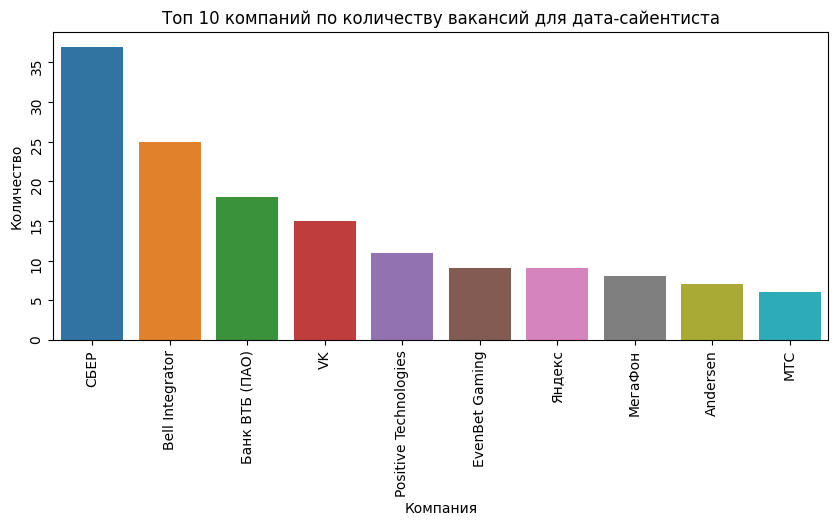

In [110]:
# Проведем дополнительное исследование

import matplotlib.pyplot as plt
import seaborn as sns

# Выведем топ 10 компаний по количеству вакансий для дата-сайентиста
query = f'''select 
                    emp.name "Компания",
                    count(*) "Количество"
                from 
                    employers emp
                    join vacancies vac on emp.id = vac.employer_id
                where 
                    /*условие выборки по ключевым словам*/
                    (lower(vac.name) like '%data scientist%'
                    or lower(vac.name) like '%data science%'
                    or lower(vac.name) like '%исследователь данных%'
                    or (vac.name like '%ML%' and lower(vac.name) not like '%html%')
                    or lower(vac.name) like '%machine learning%'
                    or lower(vac.name) like '%машинн%обучен%')
                group by emp.id
                order by 2 desc
                limit 10
         '''
         
# Результат запроса
df = pd.read_sql_query(query, connection)   

# Построим столбчатую диаграмму
fig = plt.figure(figsize=(10, 4))
barplot = sns.barplot(
    data=df,
    x='Компания',
    y='Количество',
    hue='Компания'
)
barplot.set_title('Топ 10 компаний по количеству вакансий для дата-сайентиста')
barplot.tick_params(labelrotation=90);
        
# Закрываем соединение
connection.close()

В процесее работы над проектом мы ознакомились и проанализировали данные из базы вакансий HeadHunter. Основная задача заключалась в поиске вакансий для дата-сайентистов. Из 49 тыс. вакансий, представленных в базе, под нашу задачу найдено 480 вакансий, что может быть недостаточно для создания модели машинного обучения. 

На столбчатой диаграмме представлены топ 10 компаний по количеству вакансий DS. Это крупные российские и международные IT компании.

Дата размещения вакансий отсутствует, поэтому невозможно проследить динамику количества предложений. 

Интересно было бы просмотреть данные за последние 10 лет, чтобы составить точный прогноз. Также можно проанализировать вакансии совместно с базой резюме соискателей, чтобы оценить спрос и предложение на рынке. 

Одно можно спрогнозировать - спрос на специалистов DS будет расти.